## Introduction

A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. 

##### The company wants to know:

    - Which variables are significant in predicting the price of a house, and

    - How well those variables describe the price of a house.

## Goal

To build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

### Steps
The solution is divided into the following sections: 
- Data understanding and exploration
- Data cleaning
- Data preparation
- Model building and evaluation

### Data Understanding and Exploration

#### Import the needed Modules

In [388]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn import linear_model, metrics
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE 
import statsmodels.api as sm 
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import mean_squared_error 
import os

# hide warnings
import warnings
warnings.filterwarnings('ignore')

#### Import data for exploration, check shape and glance into the data

In [389]:
housing_df = pd.read_csv("train.csv")
print(f'shape : {housing_df.shape}')
housing_df.head()

shape : (1460, 81)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


#### Checking the data type for all columns

In [390]:
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

#### Above output shows there are lot of columns with missing values.

### Understanding the data dictionary

#### Let's pick some of the columns from different categories to understand the data well

#### LotFrontage: Linear feet of street connected to property

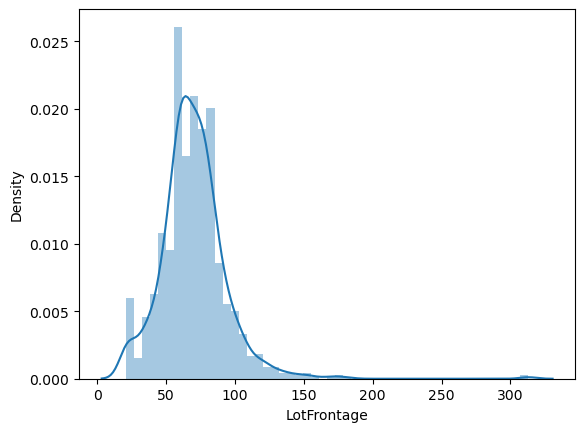

In [391]:
sns.distplot(housing_df['LotFrontage'])
plt.show()

#### MSSubClass: Identifies the type of dwelling involved in the sale. It should be of object type

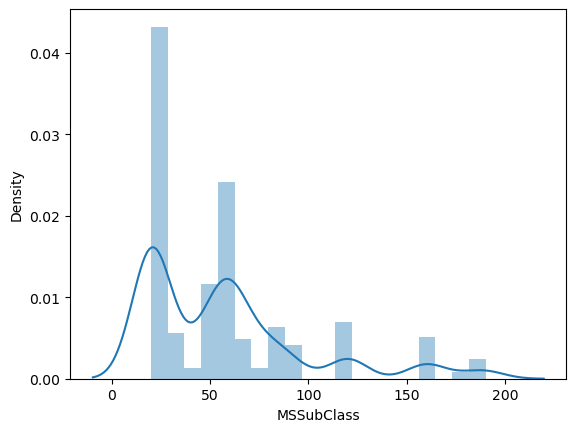

In [392]:
sns.distplot(housing_df['MSSubClass'])
plt.show()

#### LotArea: Lot size in square feet

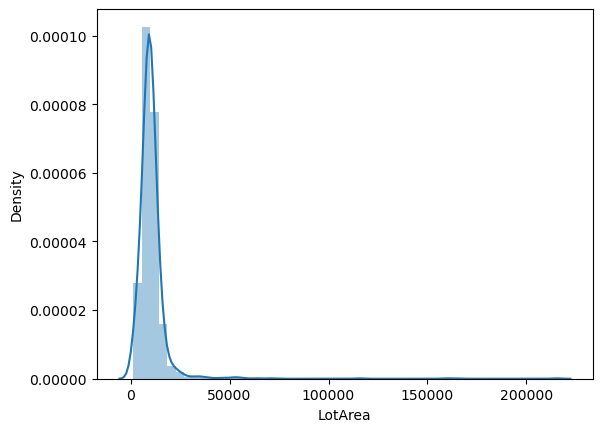

In [393]:
sns.distplot(housing_df['LotArea'])
plt.show()

#### LandSlope: Slope of property
    - Gtl	Gentle slope
    - Mod	Moderate Slope	
    - Sev	Severe Slope

In [394]:
housing_df.LandSlope.value_counts()

Gtl    1382
Mod      65
Sev      13
Name: LandSlope, dtype: int64

#### YearBuilt: Original construction date


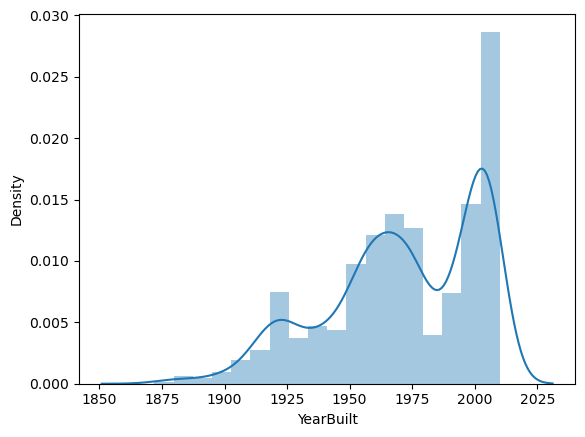

In [395]:
sns.distplot(housing_df['YearBuilt'])
plt.show()

#### BsmtQual: Evaluates the height of the basement

       Ex	Excellent (100+ inches)	
       Gd	Good (90-99 inches)
       TA	Typical (80-89 inches)
       Fa	Fair (70-79 inches)
       Po	Poor (<70 inches
       NA	No Basement

In [396]:
housing_df.BsmtQual.value_counts()

TA    649
Gd    618
Ex    121
Fa     35
Name: BsmtQual, dtype: int64

In [397]:
#### MoSold

In [398]:
housing_df.MoSold.value_counts()

6     253
7     234
5     204
4     141
8     122
3     106
10     89
11     79
9      63
12     59
1      58
2      52
Name: MoSold, dtype: int64

### Data cleaning

#### Let's check for % of null values in each columns

In [399]:
housing_df_null_perc=100 * (housing_df.isnull().sum().sort_values(ascending=False).head(23))/1460
print(housing_df_null_perc)

PoolQC          99.520548
MiscFeature     96.301370
Alley           93.767123
Fence           80.753425
FireplaceQu     47.260274
LotFrontage     17.739726
GarageYrBlt      5.547945
GarageCond       5.547945
GarageType       5.547945
GarageFinish     5.547945
GarageQual       5.547945
BsmtFinType2     2.602740
BsmtExposure     2.602740
BsmtQual         2.534247
BsmtCond         2.534247
BsmtFinType1     2.534247
MasVnrArea       0.547945
MasVnrType       0.547945
Electrical       0.068493
Id               0.000000
Functional       0.000000
Fireplaces       0.000000
KitchenQual      0.000000
dtype: float64


#### Let's analyze the columns with more than 80% null values and drop it if it's not adding signficant value.

In [400]:
housing_df_null_perc[housing_df_null_perc > 80]

PoolQC         99.520548
MiscFeature    96.301370
Alley          93.767123
Fence          80.753425
dtype: float64

#### Let's analyze above columns well as we need to careful while dropping the columns

In [401]:
housing_df['PoolQC'].value_counts()

Gd    3
Ex    2
Fa    2
Name: PoolQC, dtype: int64

In [402]:
housing_df['MiscFeature'].value_counts()

Shed    49
Gar2     2
Othr     2
TenC     1
Name: MiscFeature, dtype: int64

In [403]:
housing_df['Alley'].value_counts()

Grvl    50
Pave    41
Name: Alley, dtype: int64

In [404]:
housing_df['Fence'].value_counts()

MnPrv    157
GdPrv     59
GdWo      54
MnWw      11
Name: Fence, dtype: int64

#### Dropping columns with more than 80% null values since it's not adding any signficant as most of the values are similar 

In [405]:
columns_to_drop = ['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'Id']
print(f'Number of columns before drop {len(housing_df.columns)}')
housing_df=housing_df.drop(columns=columns_to_drop)
print(f'Number of columns after drop {len(housing_df.columns)}')
print(f'shape: {housing_df.shape}')

Number of columns before drop 81
Number of columns after drop 76
shape: (1460, 76)


#### Missing values after dropping the columns

In [406]:
housing_df.isnull().sum()[housing_df.isnull().sum()>0]

LotFrontage     259
MasVnrType        8
MasVnrArea        8
BsmtQual         37
BsmtCond         37
BsmtExposure     38
BsmtFinType1     37
BsmtFinType2     38
Electrical        1
FireplaceQu     690
GarageType       81
GarageYrBlt      81
GarageFinish     81
GarageQual       81
GarageCond       81
dtype: int64

#### Let's analyze the basement related columns first

#### TotalBsmtSF shows 'Total square feet of basement area'. If it's 0,it means the house doesn't have basement and can be set to 'NA' i.e. no basement

In [407]:
housing_df.TotalBsmtSF.value_counts()

0       37
864     35
672     17
912     15
1040    14
        ..
1838     1
1581     1
707      1
611      1
1542     1
Name: TotalBsmtSF, Length: 721, dtype: int64

In [408]:
housing_df[housing_df.TotalBsmtSF==0]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
17,90,RL,72.0,10791,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,500,10,2006,WD,Normal,90000
39,90,RL,65.0,6040,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,6,2008,WD,AdjLand,82000
90,20,RL,60.0,7200,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,7,2006,WD,Normal,109900
102,90,RL,64.0,7018,Pave,Reg,Bnk,AllPub,Inside,Gtl,...,0,0,0,0,0,6,2009,WD,Alloca,118964
156,20,RL,60.0,7200,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,6,2006,WD,Normal,109500
182,20,RL,60.0,9060,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,180,0,0,0,6,2007,WD,Normal,120000
259,20,RM,70.0,12702,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,97000
342,90,RL,NaN,8544,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,5,2006,WD,Normal,87500
362,85,RL,64.0,7301,Pave,Reg,Lvl,AllPub,Corner,Gtl,...,177,0,0,0,0,7,2009,ConLD,Normal,198500
371,50,RL,80.0,17120,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,7,2008,WD,Normal,134432


#### Setting "BsmtQual","BsmtCond","BsmtExposure","BsmtFinType1","BsmtFinType2" to 'NA' where TotalBsmtSF == 0

In [409]:
housing_df.loc[housing_df["TotalBsmtSF"]==0,["BsmtQual","BsmtCond","BsmtExposure","BsmtFinType1","BsmtFinType2"]] = "NA"
housing_df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000


#### Let's analyze the garage related columns

In [410]:
# Review Garage related columns
housing_df.loc[pd.isnull(housing_df["GarageType"]),["GarageType","GarageYrBlt","GarageFinish","GarageQual","GarageCond","GarageCars"]]


,GarageType,GarageYrBlt,GarageFinish,GarageQual,GarageCond,GarageCars
39,NaN,NaN,NaN,NaN,NaN,0
48,NaN,NaN,NaN,NaN,NaN,0
78,NaN,NaN,NaN,NaN,NaN,0
88,NaN,NaN,NaN,NaN,NaN,0
89,NaN,NaN,NaN,NaN,NaN,0
...,...,...,...,...,...,...
1349,NaN,NaN,NaN,NaN,NaN,0
1407,NaN,NaN,NaN,NaN,NaN,0
1449,NaN,NaN,NaN,NaN,NaN,0
1450,NaN,NaN,NaN,NaN,NaN,0


#### GarageCars means 'Size of garage in car capacity' . If GarageCars == 0 means there is no Garage and Garage related fields can be set to 'NA'

In [411]:
housing_df.loc[housing_df["GarageCars"]==0,["GarageType","GarageFinish","GarageQual","GarageCond"]] = "NA"
housing_df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000


#### GarageYrBlt is a float column and for the rows GarageCars==0, means there is no Garage so will impute these with 0.0(float) value

In [412]:
housing_df.loc[housing_df["GarageCars"]==0,["GarageYrBlt"]] = 0.0
housing_df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [413]:
housing_df.isnull().sum()[housing_df.isnull().sum()>0]

LotFrontage     259
MasVnrType        8
MasVnrArea        8
BsmtExposure      1
BsmtFinType2      1
Electrical        1
FireplaceQu     690
dtype: int64

In [414]:
housing_df["BsmtFinType2"].value_counts()

Unf    1256
Rec      54
LwQ      46
NA       37
BLQ      33
ALQ      19
GLQ      14
Name: BsmtFinType2, dtype: int64

#### BsmtExposure, BsmtFinType2 and electrical are categorical column, let's fill it using mode

In [415]:
housing_df.loc[pd.isnull(housing_df["MasVnrType"]),"MasVnrType"] = housing_df["MasVnrType"].mode().values[0]
housing_df.loc[pd.isnull(housing_df["BsmtExposure"]),"BsmtExposure"] = housing_df["BsmtExposure"].mode().values[0]
housing_df.loc[pd.isnull(housing_df["BsmtFinType2"]),"BsmtFinType2"] = housing_df["BsmtFinType2"].mode().values[0]
housing_df.loc[pd.isnull(housing_df["Electrical"]),"Electrical"] = housing_df["Electrical"].mode().values[0]

In [416]:
housing_df[housing_df.Fireplaces==0][['Fireplaces', 'FireplaceQu']]

,Fireplaces,FireplaceQu
0,0,NaN
5,0,NaN
10,0,NaN
12,0,NaN
15,0,NaN
...,...,...
1452,0,NaN
1453,0,NaN
1454,0,NaN
1458,0,NaN


In [417]:
housing_df.FireplaceQu = housing_df.FireplaceQu.fillna('NA')

In [418]:
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   LotShape       1460 non-null   object 
 6   LandContour    1460 non-null   object 
 7   Utilities      1460 non-null   object 
 8   LotConfig      1460 non-null   object 
 9   LandSlope      1460 non-null   object 
 10  Neighborhood   1460 non-null   object 
 11  Condition1     1460 non-null   object 
 12  Condition2     1460 non-null   object 
 13  BldgType       1460 non-null   object 
 14  HouseStyle     1460 non-null   object 
 15  OverallQual    1460 non-null   int64  
 16  OverallCond    1460 non-null   int64  
 17  YearBuilt      1460 non-null   int64  
 18  YearRemo

#### Imputing missing/null values for other Numerical columns

In [419]:
housing_df.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


#### Imputing LotFrontage (Linear feet of street connected to property) with median value as it's Continuous data

In [420]:
housing_df['LotFrontage'].median()

69.0

In [421]:
housing_df.LotFrontage.fillna(housing_df['LotFrontage'].median())

0       65.0
1       80.0
2       68.0
3       60.0
4       84.0
        ... 
1455    62.0
1456    85.0
1457    66.0
1458    68.0
1459    75.0
Name: LotFrontage, Length: 1460, dtype: float64

In [422]:
housing_df.LotFrontage = housing_df.LotFrontage.fillna(housing_df['LotFrontage'].median())

In [423]:
housing_df.isnull().sum()[housing_df.isnull().sum()>0]

MasVnrArea    8
dtype: int64

#### MasVnrArea is a quantitative column, let's use median to fill missing values

In [424]:
housing_df.MasVnrArea = housing_df.MasVnrArea.fillna(housing_df['MasVnrArea'].median())

In [425]:
housing_df.isnull().sum()[housing_df.isnull().sum()>0]

Series([], dtype: int64)

In [426]:
housing_df.shape

(1460, 76)

### Data preparation

#### Creating Derived variables - Feature Engineering

- Total area in square foot column can be created since we have areas for floor and basement
- Similar total porch area can be calculated separately using openporch area, enclosed porch area etc
- Total bathroom count can be created as there are full bath and half bath

In [427]:
housing_df['Total_sqr_footage'] = (housing_df['BsmtFinSF1'] + housing_df['BsmtFinSF2'] + housing_df['1stFlrSF'] + housing_df['2ndFlrSF'])

housing_df['Total_Bathrooms'] = (housing_df['FullBath'] + (0.5 * housing_df['HalfBath']) + housing_df['BsmtFullBath'] + (0.5 * housing_df['BsmtHalfBath']))

housing_df['Total_porch_sf'] = (housing_df['OpenPorchSF'] + housing_df['3SsnPorch'] + housing_df['EnclosedPorch'] + housing_df['ScreenPorch'] + housing_df['WoodDeckSF'])

# Drop extra columns
extraCols = ['BsmtFinSF1','BsmtFinSF2','1stFlrSF','2ndFlrSF','FullBath','HalfBath','BsmtFullBath','BsmtHalfBath','OpenPorchSF','3SsnPorch','EnclosedPorch','ScreenPorch','WoodDeckSF']
housing_df.drop(extraCols,axis=1,inplace=True)
housing_df.shape

(1460, 66)

#### Drop the column one value having frequency > 90%

In [428]:
colToDrop = [] 

for col in housing_df.columns :
    if housing_df[col].value_counts().max() >= 1460*0.90:
        colToDrop.append(col)
print(colToDrop)


['Street', 'Utilities', 'LandSlope', 'Condition2', 'RoofMatl', 'Heating', 'CentralAir', 'Electrical', 'LowQualFinSF', 'KitchenAbvGr', 'Functional', 'GarageCond', 'PavedDrive', 'PoolArea', 'MiscVal']


In [429]:
# Removing these columns
housing_df.drop(colToDrop,axis=1,inplace=True)
housing_df.shape

(1460, 51)

#### Age related derived variables
- Total_Age = YrSold - YrBuilt
- Garage_age = YrSold - GarageYrBlt
- Remodel_age = Remodel_age - YearRemodAdd

In [430]:
housing_df['Total_Age']=housing_df['YrSold']-housing_df['YearBuilt']
housing_df['Garage_age'] = housing_df['YrSold'] - housing_df['GarageYrBlt']
housing_df['Remodel_age'] = housing_df['YrSold'] - housing_df['YearRemodAdd']

In [431]:
#Drop extra columns
drop_cols = ['GarageYrBlt','YearRemodAdd']
housing_df.drop(labels = drop_cols, axis = 1, inplace=True) #Dropping the columns added in the list
print("The new size of the data is" , housing_df.shape) #Printing the new Dataset Shape

The new size of the data is (1460, 52)


In [432]:
housing_df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,Neighborhood,Condition1,BldgType,...,YrSold,SaleType,SaleCondition,SalePrice,Total_sqr_footage,Total_Bathrooms,Total_porch_sf,Total_Age,Garage_age,Remodel_age
0,60,RL,65.0,8450,Reg,Lvl,Inside,CollgCr,Norm,1Fam,...,2008,WD,Normal,208500,2416,3.5,61,5,5.0,5
1,20,RL,80.0,9600,Reg,Lvl,FR2,Veenker,Feedr,1Fam,...,2007,WD,Normal,181500,2240,2.5,298,31,31.0,31
2,60,RL,68.0,11250,IR1,Lvl,Inside,CollgCr,Norm,1Fam,...,2008,WD,Normal,223500,2272,3.5,42,7,7.0,6
3,70,RL,60.0,9550,IR1,Lvl,Corner,Crawfor,Norm,1Fam,...,2006,WD,Abnorml,140000,1933,2.0,307,91,8.0,36
4,60,RL,84.0,14260,IR1,Lvl,FR2,NoRidge,Norm,1Fam,...,2008,WD,Normal,250000,2853,3.5,276,8,8.0,8


In [433]:
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 52 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   MSSubClass         1460 non-null   int64  
 1   MSZoning           1460 non-null   object 
 2   LotFrontage        1460 non-null   float64
 3   LotArea            1460 non-null   int64  
 4   LotShape           1460 non-null   object 
 5   LandContour        1460 non-null   object 
 6   LotConfig          1460 non-null   object 
 7   Neighborhood       1460 non-null   object 
 8   Condition1         1460 non-null   object 
 9   BldgType           1460 non-null   object 
 10  HouseStyle         1460 non-null   object 
 11  OverallQual        1460 non-null   int64  
 12  OverallCond        1460 non-null   int64  
 13  YearBuilt          1460 non-null   int64  
 14  RoofStyle          1460 non-null   object 
 15  Exterior1st        1460 non-null   object 
 16  Exterior2nd        1460 

### Data visualization(in brief)

In [434]:
#Lets divide the Columns based on Numerical/continous and categorical
Catcols = []
Numcols = []
for col in housing_df.columns :
    if housing_df[col].dtype == "object":
        Catcols.append(col)
    else:
        Numcols.append(col)
print("Categorical columns",len(Catcols) ,"Categorical Columns are :\n")
print(Catcols,"\n")
print("Numerical Columns",len(Numcols) ,"Numerical Columns are :\n")
print(Numcols)

Categorical columns 28 Categorical Columns are :

['MSZoning', 'LotShape', 'LandContour', 'LotConfig', 'Neighborhood', 'Condition1', 'BldgType', 'HouseStyle', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'HeatingQC', 'KitchenQual', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'SaleType', 'SaleCondition'] 

Numerical Columns 24 Numerical Columns are :

['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'MasVnrArea', 'BsmtUnfSF', 'TotalBsmtSF', 'GrLivArea', 'BedroomAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'MoSold', 'YrSold', 'SalePrice', 'Total_sqr_footage', 'Total_Bathrooms', 'Total_porch_sf', 'Total_Age', 'Garage_age', 'Remodel_age']


#### Visualizing categorical columns

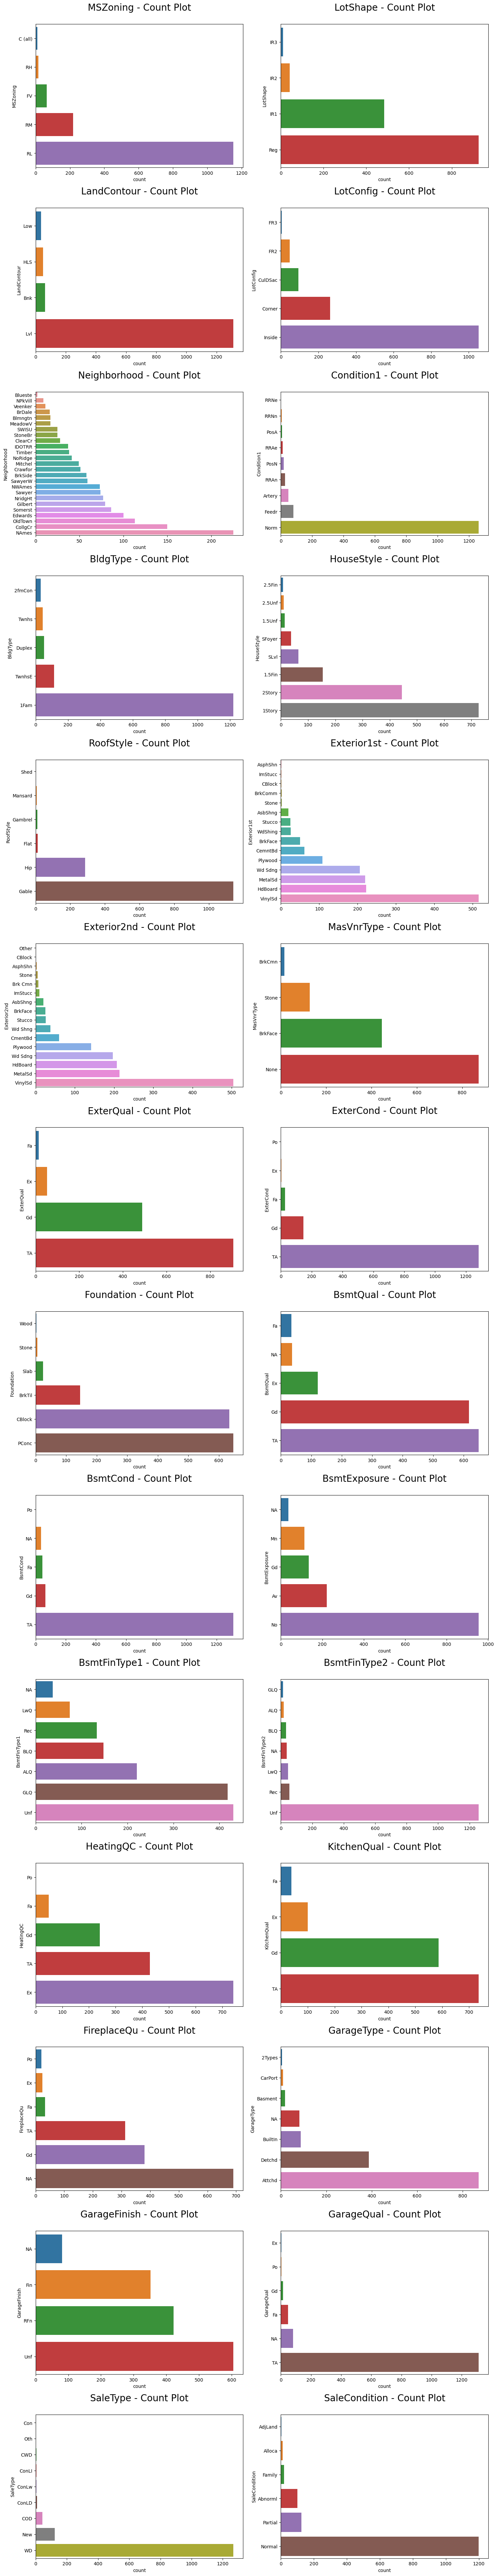

In [435]:
plt.figure(figsize=(15,110))
c=0
for col in Catcols:
    c=c+1
    plt.subplot(20,2,c)
    sns.countplot(y=housing_df[str(col)],order=housing_df[str(col)].value_counts().sort_values().index)
    plt.title(str(col)+" - Count Plot\n",fontsize=20)
plt.tight_layout()
plt.show()#to display the plot

In [436]:
#Lets first observe the data in terms of percentile
housing_df.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,MasVnrArea,BsmtUnfSF,TotalBsmtSF,GrLivArea,...,GarageArea,MoSold,YrSold,SalePrice,Total_sqr_footage,Total_Bathrooms,Total_porch_sf,Total_Age,Garage_age,Remodel_age
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,69.863699,10516.828082,6.099315,5.575342,1971.267808,103.117123,567.240411,1057.429452,1515.463699,...,472.980137,6.321918,2007.815753,180921.195890,1999.808219,2.210616,181.329452,36.547945,139.076027,22.950000
std,42.300571,22.027677,9981.264932,1.382997,1.112799,30.202904,180.731373,441.866955,438.705324,525.480383,...,213.804841,2.703626,1.328095,79442.502883,773.992942,0.785399,156.656097,30.250152,453.714026,20.640653
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,0.000000,0.000000,0.000000,334.000000,...,0.000000,1.000000,2006.000000,34900.000000,334.000000,1.000000,0.000000,0.000000,0.000000,-1.000000
25%,20.000000,60.000000,7553.500000,5.000000,5.000000,1954.000000,0.000000,223.000000,795.750000,1129.500000,...,334.500000,5.000000,2007.000000,129975.000000,1493.000000,2.000000,45.000000,8.000000,7.000000,4.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,0.000000,477.500000,991.500000,1464.000000,...,480.000000,6.000000,2008.000000,163000.000000,1863.500000,2.000000,164.000000,35.000000,30.000000,14.000000
75%,70.000000,79.000000,11601.500000,7.000000,6.000000,2000.000000,164.250000,808.000000,1298.250000,1776.750000,...,576.000000,8.000000,2009.000000,214000.000000,2383.500000,2.500000,266.000000,54.000000,50.000000,41.000000
90%,120.000000,92.000000,14381.700000,8.000000,7.000000,2006.000000,335.000000,1232.000000,1602.200000,2158.300000,...,757.100000,10.000000,2010.000000,278000.000000,3023.100000,3.500000,382.000000,84.000000,79.100000,56.000000
95%,160.000000,104.000000,17401.150000,8.000000,8.000000,2007.000000,456.000000,1468.000000,1753.000000,2466.100000,...,850.100000,11.000000,2010.000000,326100.000000,3334.150000,3.500000,472.150000,91.000000,2006.000000,58.000000
99%,190.000000,137.410000,37567.640000,10.000000,9.000000,2009.000000,791.280000,1797.050000,2155.050000,3123.480000,...,1002.790000,12.000000,2010.000000,442567.010000,4107.510000,4.000000,670.000000,110.410000,2009.000000,60.000000


#### Numerical column plots

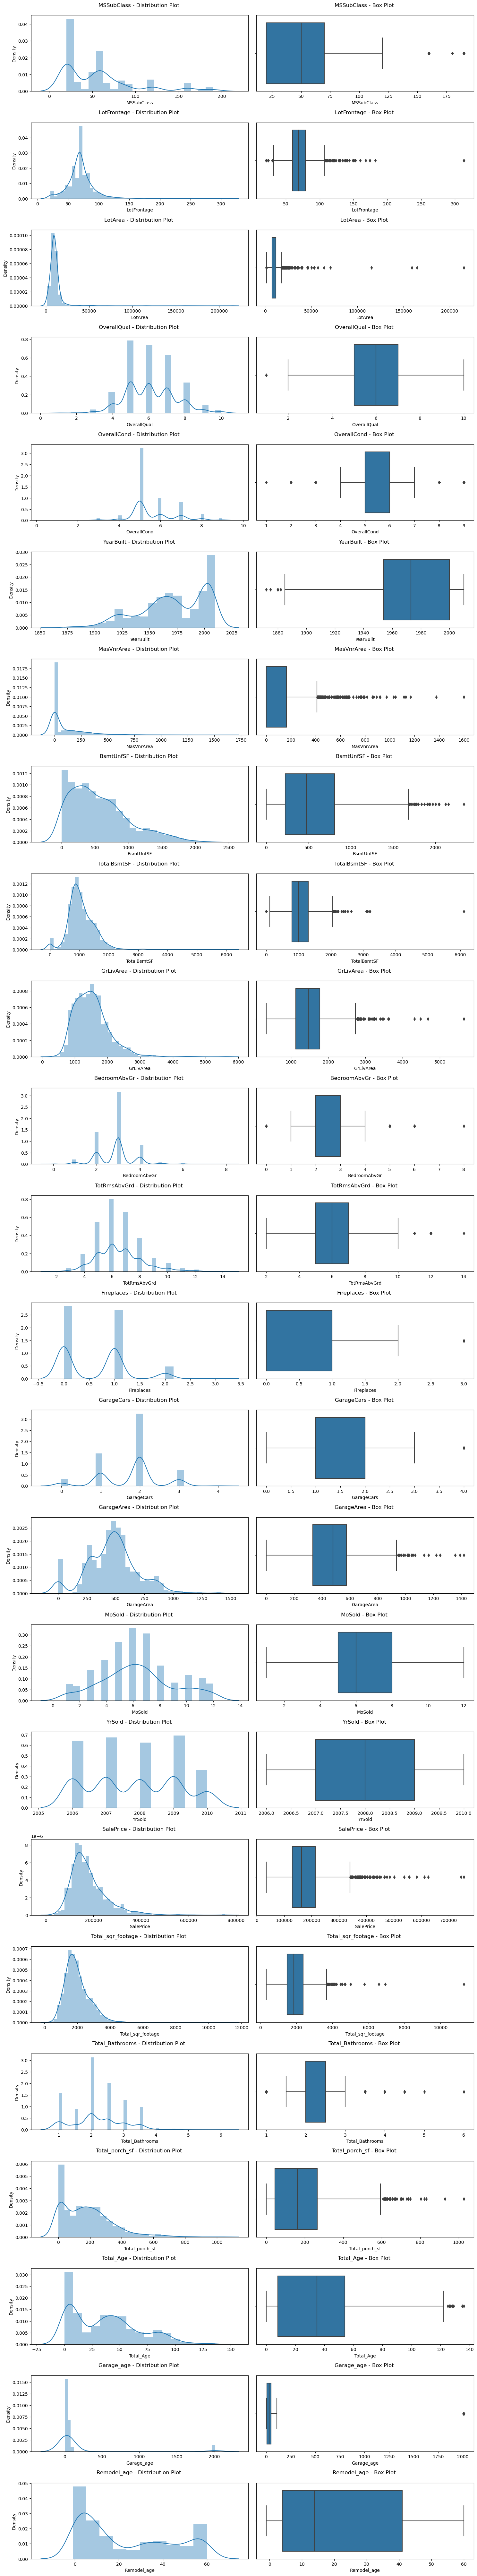

In [437]:
plt.figure(figsize=(15,100))
c=0
for col in Numcols:
    c=c+1
    plt.subplot(30,2,c)
    plt.title(str(col)+" - Distribution Plot \n")
    sns.distplot(housing_df[str(col)])
    c=c+1
    plt.subplot(30,2,c)
    plt.title(str(col)+" - Box Plot \n")
    sns.boxplot(housing_df[str(col)])
plt.tight_layout()
plt.show()

#### Let's remove the outliers using quick and dirty method. let's consider 98%ile + as outliers

In [438]:
outliers = ['LotFrontage','LotArea','MasVnrArea','GrLivArea','Total_sqr_footage','Total_porch_sf']
for outlier in outliers:
    qnt = housing_df[outlier].quantile(0.98)
    housing_df = housing_df[housing_df[outlier] < qnt]
housing_df.shape

(1290, 52)

In [439]:
#Also lets find out which variables has high correlation with SalesPrice
housing_df.corr()['SalePrice'].round(decimals = 2).sort_values(ascending=False)

SalePrice            1.00
OverallQual          0.80
Total_sqr_footage    0.67
GrLivArea            0.65
GarageCars           0.64
YearBuilt            0.62
GarageArea           0.62
TotalBsmtSF          0.61
Total_Bathrooms      0.61
Fireplaces           0.44
TotRmsAbvGrd         0.43
MasVnrArea           0.39
Total_porch_sf       0.36
LotArea              0.35
LotFrontage          0.34
BsmtUnfSF            0.26
BedroomAbvGr         0.13
MoSold               0.10
YrSold              -0.03
MSSubClass          -0.08
OverallCond         -0.10
Garage_age          -0.30
Remodel_age         -0.56
Total_Age           -0.62
Name: SalePrice, dtype: float64

Observation: SalesPrice is mostly corelated with variables like OverallQual, GrLivArea, Total_sqr_footage,YearBuilt, and  GarageCars

### Data preparation

##### Data-type change for ategorical columns from object to category

In [440]:
Catcols = []
for col in housing_df.columns :
    if housing_df[col].dtype == "object":
        housing_df[col]=housing_df[col].astype('category')
        Catcols.append(col)
print(f"Categorical col lists are {len(Catcols)}")
print(Catcols)
housing_df.info()


Categorical col lists are 28
['MSZoning', 'LotShape', 'LandContour', 'LotConfig', 'Neighborhood', 'Condition1', 'BldgType', 'HouseStyle', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'HeatingQC', 'KitchenQual', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'SaleType', 'SaleCondition']
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1290 entries, 0 to 1458
Data columns (total 52 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   MSSubClass         1290 non-null   int64   
 1   MSZoning           1290 non-null   category
 2   LotFrontage        1290 non-null   float64 
 3   LotArea            1290 non-null   int64   
 4   LotShape           1290 non-null   category
 5   LandContour        1290 non-null   category
 6   LotConfig          1290 non-null   category
 7   Neighborhood       1290 

#### Creating dummies  for categorical columns

In [441]:
housing_df = pd.get_dummies(housing_df,drop_first=True)
housing_df.info()#displaying the updated Datatypes

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1290 entries, 0 to 1458
Columns: 193 entries, MSSubClass to SaleCondition_Partial
dtypes: float64(4), int64(20), uint8(169)
memory usage: 464.9 KB


In [442]:
housing_df.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,MasVnrArea,BsmtUnfSF,TotalBsmtSF,GrLivArea,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,7,5,2003,196.0,150,856,1710,...,0,0,0,0,1,0,0,0,1,0
1,20,80.0,9600,6,8,1976,0.0,284,1262,1262,...,0,0,0,0,1,0,0,0,1,0
2,60,68.0,11250,7,5,2001,162.0,434,920,1786,...,0,0,0,0,1,0,0,0,1,0
3,70,60.0,9550,7,5,1915,0.0,540,756,1717,...,0,0,0,0,1,0,0,0,0,0
4,60,84.0,14260,8,5,2000,350.0,490,1145,2198,...,0,0,0,0,1,0,0,0,1,0


In [443]:
housing_df.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,MasVnrArea,BsmtUnfSF,TotalBsmtSF,GrLivArea,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
count,1290.000000,1290.000000,1290.000000,1290.000000,1290.000000,1290.000000,1290.000000,1290.000000,1290.000000,1290.000000,...,1290.000000,1290.000000,1290.000000,1290.000000,1290.000000,1290.000000,1290.000000,1290.000000,1290.000000,1290.000000
mean,57.414729,67.135659,9172.652713,5.957364,5.575194,1970.429457,81.151163,563.310078,1004.504651,1424.022481,...,0.003101,0.003876,0.074419,0.002326,0.873643,0.003101,0.006977,0.014729,0.828682,0.075969
std,43.229350,17.234819,3382.298199,1.287481,1.106160,30.079183,131.331451,433.622435,380.443649,412.074577,...,0.055620,0.062161,0.262553,0.048187,0.332380,0.055620,0.083267,0.120511,0.376933,0.265051
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,0.000000,0.000000,0.000000,334.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,60.000000,7200.000000,5.000000,5.000000,1952.000000,0.000000,219.250000,780.000000,1098.250000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,50.000000,69.000000,9100.000000,6.000000,5.000000,1971.500000,0.000000,484.500000,953.000000,1395.500000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,70.000000,75.000000,11002.250000,7.000000,6.000000,2000.000000,136.000000,803.750000,1218.750000,1700.750000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,190.000000,120.000000,21930.000000,10.000000,9.000000,2010.000000,640.000000,2121.000000,3206.000000,2634.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [444]:
housing_df.shape

(1290, 193)

#### Test-Train split

In [445]:
df_train,df_test = train_test_split(housing_df, train_size = 0.7, random_state = 100)
print ("The Size of Train data is",df_train.shape)
print ("The Size of Test data is",df_test.shape)

The Size of Train data is (902, 193)
The Size of Test data is (388, 193)


#### Applying Minmaxscaler on training data

In [446]:
#Lets extract the numerical columns from the df_train
Num_cols = []
for i in df_train.columns :
    if df_train[i].dtype != "uint8":
        Num_cols.append(i)
print(f"Numerical clomuns : {len(Num_cols)}")
print(Num_cols)

Scaler = MinMaxScaler() # Instantiate an objectr
#Note-The above order of columns in num_cols should be same in df_test, otherwise we will get a wrong r-square value
df_train[Num_cols] = Scaler.fit_transform(df_train[Num_cols])

#Inspect the data in percentile after min-max Scaling
df_train[Num_cols].describe()

Numerical clomuns : 24
['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'MasVnrArea', 'BsmtUnfSF', 'TotalBsmtSF', 'GrLivArea', 'BedroomAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'MoSold', 'YrSold', 'SalePrice', 'Total_sqr_footage', 'Total_Bathrooms', 'Total_porch_sf', 'Total_Age', 'Garage_age', 'Remodel_age']


,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,MasVnrArea,BsmtUnfSF,TotalBsmtSF,GrLivArea,...,GarageArea,MoSold,YrSold,SalePrice,Total_sqr_footage,Total_Bathrooms,Total_porch_sf,Total_Age,Garage_age,Remodel_age
count,902.000000,902.000000,902.000000,902.000000,902.000000,902.000000,902.000000,902.000000,902.000000,902.000000,...,902.000000,902.000000,902.000000,902.000000,902.000000,902.000000,902.000000,902.000000,902.000000,902.000000
mean,0.212860,0.468499,0.378431,0.550505,0.513145,0.710555,0.127421,0.265488,0.313282,0.476659,...,0.323455,0.478129,0.454545,0.328326,0.506899,0.223947,0.297030,0.277659,0.074200,0.400148
std,0.244419,0.166552,0.162891,0.145787,0.159550,0.217767,0.210839,0.202934,0.121923,0.179894,...,0.144953,0.245623,0.328977,0.150592,0.195825,0.148027,0.235572,0.221172,0.233804,0.350900
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.393939,0.279812,0.444444,0.428571,0.572464,0.000000,0.102074,0.243294,0.339348,...,0.221583,0.295455,0.250000,0.227802,0.368926,0.100000,0.080882,0.058824,0.003980,0.066667
50%,0.176471,0.484848,0.373222,0.555556,0.428571,0.717391,0.000000,0.228901,0.296943,0.469565,...,0.332014,0.454545,0.500000,0.295756,0.486612,0.200000,0.284007,0.272059,0.015423,0.266667
75%,0.294118,0.545455,0.467560,0.666667,0.571429,0.927536,0.205556,0.383310,0.378665,0.598152,...,0.405755,0.636364,0.750000,0.397068,0.620000,0.300000,0.455882,0.419118,0.025746,0.733333
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Feature selection using RFE

In [447]:
#Define X_train and y_train
y_train = df_train.pop('SalePrice') #target variable
X_train = df_train #Feature variable


In [448]:
X_train.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 902 entries, 715 to 900
Columns: 192 entries, MSSubClass to SaleCondition_Partial
dtypes: float64(23), uint8(169)
memory usage: 318.0 KB


In [449]:
y_train.info()

<class 'pandas.core.series.Series'>
Int64Index: 902 entries, 715 to 900
Series name: SalePrice
Non-Null Count  Dtype  
--------------  -----  
902 non-null    float64
dtypes: float64(1)
memory usage: 14.1 KB


#### Feature selection using RFE

In [450]:
lr = LinearRegression()

rfe = RFE(lr, n_features_to_select=80)
rfe = rfe.fit(X_train,y_train)
#View the support_ and rank_ 
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('MSSubClass', False, 102),
 ('LotFrontage', False, 77),
 ('LotArea', True, 1),
 ('OverallQual', True, 1),
 ('OverallCond', True, 1),
 ('YearBuilt', True, 1),
 ('MasVnrArea', False, 54),
 ('BsmtUnfSF', True, 1),
 ('TotalBsmtSF', True, 1),
 ('GrLivArea', True, 1),
 ('BedroomAbvGr', True, 1),
 ('TotRmsAbvGrd', False, 80),
 ('Fireplaces', True, 1),
 ('GarageCars', True, 1),
 ('GarageArea', False, 65),
 ('MoSold', False, 105),
 ('YrSold', True, 1),
 ('Total_sqr_footage', False, 51),
 ('Total_Bathrooms', True, 1),
 ('Total_porch_sf', True, 1),
 ('Total_Age', True, 1),
 ('Garage_age', True, 1),
 ('Remodel_age', False, 29),
 ('MSZoning_FV', True, 1),
 ('MSZoning_RH', False, 43),
 ('MSZoning_RL', False, 27),
 ('MSZoning_RM', False, 42),
 ('LotShape_IR2', False, 78),
 ('LotShape_IR3', False, 39),
 ('LotShape_Reg', False, 112),
 ('LandContour_HLS', False, 58),
 ('LandContour_Low', False, 8),
 ('LandContour_Lvl', False, 41),
 ('LotConfig_CulDSac', False, 56),
 ('LotConfig_FR2', False, 26),
 ('Lo

#### Columns selected by RFE

In [451]:
Rfe_Cols = X_train.columns[rfe.support_]
Rfe_Cols

Index(['LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'BsmtUnfSF',
       'TotalBsmtSF', 'GrLivArea', 'BedroomAbvGr', 'Fireplaces', 'GarageCars',
       'YrSold', 'Total_Bathrooms', 'Total_porch_sf', 'Total_Age',
       'Garage_age', 'MSZoning_FV', 'Neighborhood_Blueste',
       'Neighborhood_ClearCr', 'Neighborhood_Crawfor', 'Neighborhood_Edwards',
       'Neighborhood_Gilbert', 'Neighborhood_Mitchel', 'Neighborhood_NAmes',
       'Neighborhood_NWAmes', 'Neighborhood_NridgHt', 'Neighborhood_OldTown',
       'Neighborhood_StoneBr', 'Neighborhood_Timber', 'Condition1_PosN',
       'Condition1_RRAe', 'BldgType_Duplex', 'BldgType_Twnhs',
       'BldgType_TwnhsE', 'RoofStyle_Gable', 'RoofStyle_Gambrel',
       'RoofStyle_Hip', 'RoofStyle_Mansard', 'Exterior1st_BrkComm',
       'Exterior1st_BrkFace', 'Exterior1st_CBlock', 'Exterior1st_CemntBd',
       'Exterior1st_Stone', 'Exterior2nd_BrkFace', 'Exterior2nd_CBlock',
       'Exterior2nd_CmentBd', 'Exterior2nd_Other', 'Exterior2nd_Ston

In [452]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 388 entries, 1437 to 999
Columns: 193 entries, MSSubClass to SaleCondition_Partial
dtypes: float64(4), int64(20), uint8(169)
memory usage: 139.8 KB


#### MinMax scaler on test data

In [453]:

Num_cols = []
for i in df_test.columns :
    if df_test[i].dtype != "uint8":
        Num_cols.append(i)
print("Below are the list of",len(Num_cols) ,"Numerical Columns are :\n")
print(Num_cols)
Scaler = MinMaxScaler() # Instantiate an object
#Note-The above order of columns in num_cols should be same in df_test, otherwise we will get a wrong r-square value
df_test[Num_cols] = Scaler.fit_transform(df_test[Num_cols])

Below are the list of 24 Numerical Columns are :

['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'MasVnrArea', 'BsmtUnfSF', 'TotalBsmtSF', 'GrLivArea', 'BedroomAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'MoSold', 'YrSold', 'SalePrice', 'Total_sqr_footage', 'Total_Bathrooms', 'Total_porch_sf', 'Total_Age', 'Garage_age', 'Remodel_age']


In [454]:
#Define X_test and y_test
y_test = df_test.pop('SalePrice') #This contains only the Target Variable
X_test = df_test 

## Ridge Regularization

In [455]:
# Consider following alphas
params = {'alpha': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 
                    9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# 5-fold cross validation
folds = 5
ridge_model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
ridge_model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5,
                                   0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0,
                                   6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500,
                                   1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [456]:
ridge_cv_results = pd.DataFrame(ridge_model_cv.cv_results_)
ridge_cv_results = ridge_cv_results[ridge_cv_results['param_alpha']<=1000]
ridge_cv_results[['param_alpha', 'mean_train_score', 'mean_test_score', 'rank_test_score']].sort_values(by = ['rank_test_score'])


,param_alpha,mean_train_score,mean_test_score,rank_test_score
13,2.0,-0.026722,-0.032590,1
14,3.0,-0.027207,-0.032663,2
12,1.0,-0.026245,-0.032891,3
15,4.0,-0.027704,-0.032892,4
11,0.9,-0.026198,-0.032964,5
10,0.8,-0.026149,-0.033051,6
9,0.7,-0.026097,-0.033160,7
16,5.0,-0.028190,-0.033174,8
8,0.6,-0.026043,-0.033289,9
7,0.5,-0.025984,-0.033438,10


#### Visualize Negative Mean Absolute Error vs alpha for train and test

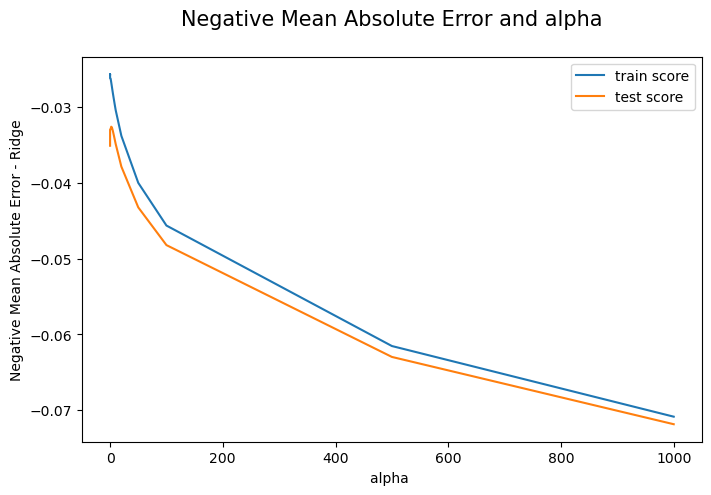

In [457]:
ridge_cv_results['param_alpha'] = ridge_cv_results['param_alpha'].astype('int32')
plt.figure(figsize=(8,5))
plt.plot(ridge_cv_results['param_alpha'], ridge_cv_results['mean_train_score'])
plt.plot(ridge_cv_results['param_alpha'], ridge_cv_results['mean_test_score'])
plt.xlabel('alpha ')
plt.ylabel('Negative Mean Absolute Error - Ridge')
plt.title("Negative Mean Absolute Error and alpha\n",fontsize=15)
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [458]:
ridge_model_cv.best_params_


{'alpha': 2.0}

#### Ridge coefficient on alpha= 2.0

In [459]:
alpha = 2.0
ridge = Ridge(alpha=alpha)
ridge.fit(X_train, y_train)
ridge.coef_


array([-3.10661463e-02,  6.76057756e-03,  5.87465607e-02,  1.24508850e-01,
        8.14211436e-02,  5.79088067e-02,  1.23681109e-02,  2.20749009e-02,
        6.11407350e-02,  1.15330097e-01, -6.97601579e-03,  2.52175472e-02,
        3.08775987e-02,  3.32200495e-02,  2.61630704e-02,  9.02264017e-04,
        2.42940260e-03,  1.29806946e-01,  3.65177980e-02,  3.24179620e-02,
       -5.86889538e-02,  7.55282986e-04, -2.39847105e-02,  3.16843453e-02,
       -2.78837260e-03,  2.40105986e-02,  6.13348169e-03, -9.06986047e-04,
       -7.16484816e-03,  2.24247635e-04,  1.56875216e-02, -1.80260896e-02,
       -4.32750321e-03,  1.24318149e-02, -1.82240288e-02, -1.24580568e-02,
       -1.25751834e-03,  0.00000000e+00,  1.26091675e-02,  1.14856573e-02,
       -2.19622509e-02, -1.91899631e-02,  4.81307105e-02, -3.46002354e-02,
       -2.75961674e-02, -8.69057424e-04, -2.41593711e-03, -3.94270372e-02,
       -2.54130975e-02,  1.97833291e-02, -2.41396920e-02,  1.52067502e-02,
        3.89365641e-02, -

In [460]:
#### Mean square error and r2 on train and test data

In [461]:

mse = mean_squared_error(y_test, ridge.predict(X_test))
print("MSE ",mse)

# predicting the R2 value of train data
y_train_pred = ridge.predict(X_train)
r2_train = metrics.r2_score(y_true=y_train, y_pred=y_train_pred)
print("The r2 on train data is ",r2_train)

#predicting the R2 value of test data
y_test_pred = ridge.predict(X_test)
r2_test = metrics.r2_score(y_true=y_test, y_pred=y_test_pred)
print("The r2 on test data is ",r2_test)

MSE  0.0029710037334737646
The r2 on train data is  0.9305507254803793
The r2 on test data is  0.8967855988434912


#### Check MSE on adjacent alphas 2+1=3 and 2-1=1

In [462]:
alpha = 1.0
ridge = Ridge(alpha=alpha)
ridge.fit(X_train, y_train)
ridge.coef_
print("The output when alpha is 1: ")
mse = mean_squared_error(y_test, ridge.predict(X_test))
print("The mean squared error value is ",mse)
r2_train = metrics.r2_score(y_true=y_train, y_pred=y_train_pred)
print("The r2 value of train data is ",r2_train)
r2_test = metrics.r2_score(y_true=y_test, y_pred=y_test_pred)
print("The r2 value of test data is ",r2_test)
print()
alpha = 2.0
ridge = Ridge(alpha=alpha)
ridge.fit(X_train, y_train)
ridge.coef_
print("The output when alpha is 2: ")
mse = mean_squared_error(y_test, ridge.predict(X_test))
print("The mean squared error value is ",mse)
r2_train = metrics.r2_score(y_true=y_train, y_pred=y_train_pred)
print("The r2 value of train data is ",r2_train)
r2_test = metrics.r2_score(y_true=y_test, y_pred=y_test_pred)
print("The r2 value of test data is ",r2_test)
print()
alpha = 3.0
ridge = Ridge(alpha=alpha)
ridge.fit(X_train, y_train)
ridge.coef_
print("The output when alpha is 3: ")
mse = mean_squared_error(y_test, ridge.predict(X_test))
print("The mean squared error value is ",mse)
r2_train = metrics.r2_score(y_true=y_train, y_pred=y_train_pred)
print("The r2 value of train data is ",r2_train)
r2_test = metrics.r2_score(y_true=y_test, y_pred=y_test_pred)
print("The r2 value of test data is ",r2_test)

The output when alpha is 1: 
The mean squared error value is  0.002987353283679681
The r2 value of train data is  0.9305507254803793
The r2 value of test data is  0.8967855988434912

The output when alpha is 2: 
The mean squared error value is  0.0029710037334737646
The r2 value of train data is  0.9305507254803793
The r2 value of test data is  0.8967855988434912

The output when alpha is 3: 
The mean squared error value is  0.0029911029169712735
The r2 value of train data is  0.9305507254803793
The r2 value of test data is  0.8967855988434912


#### Increase in MSE for alpha=3 and 1 show alpha=2 is the best value

In [463]:
house_ridge = pd.DataFrame({'Features':X_train.columns, 'coeff':ridge.coef_.round(3)})
house_ridge.reset_index(drop=True, inplace=True)
house_ridge

,Features,coeff
0,MSSubClass,-0.033
1,LotFrontage,0.010
2,LotArea,0.055
3,OverallQual,0.116
4,OverallCond,0.075
...,...,...
187,SaleCondition_AdjLand,0.014
188,SaleCondition_Alloca,0.008
189,SaleCondition_Family,-0.003
190,SaleCondition_Normal,0.018


#### Ridge coefficients

In [464]:
ridge_coeff_dict = dict(pd.Series(ridge.coef_.round(3), index = X_train.columns))
ridge_coeff_dict

{'MSSubClass': -0.033,
 'LotFrontage': 0.01,
 'LotArea': 0.055,
 'OverallQual': 0.116,
 'OverallCond': 0.075,
 'YearBuilt': 0.053,
 'MasVnrArea': 0.014,
 'BsmtUnfSF': 0.022,
 'TotalBsmtSF': 0.059,
 'GrLivArea': 0.108,
 'BedroomAbvGr': -0.003,
 'TotRmsAbvGrd': 0.028,
 'Fireplaces': 0.03,
 'GarageCars': 0.033,
 'GarageArea': 0.028,
 'MoSold': 0.001,
 'YrSold': 0.003,
 'Total_sqr_footage': 0.125,
 'Total_Bathrooms': 0.037,
 'Total_porch_sf': 0.033,
 'Total_Age': -0.054,
 'Garage_age': 0.0,
 'Remodel_age': -0.026,
 'MSZoning_FV': 0.028,
 'MSZoning_RH': -0.005,
 'MSZoning_RL': 0.022,
 'MSZoning_RM': 0.004,
 'LotShape_IR2': 0.0,
 'LotShape_IR3': -0.006,
 'LotShape_Reg': -0.0,
 'LandContour_HLS': 0.017,
 'LandContour_Low': -0.016,
 'LandContour_Lvl': -0.004,
 'LotConfig_CulDSac': 0.013,
 'LotConfig_FR2': -0.018,
 'LotConfig_FR3': -0.01,
 'LotConfig_Inside': -0.001,
 'Neighborhood_Blueste': 0.0,
 'Neighborhood_BrDale': 0.011,
 'Neighborhood_BrkSide': 0.012,
 'Neighborhood_ClearCr': -0.019,
 'N

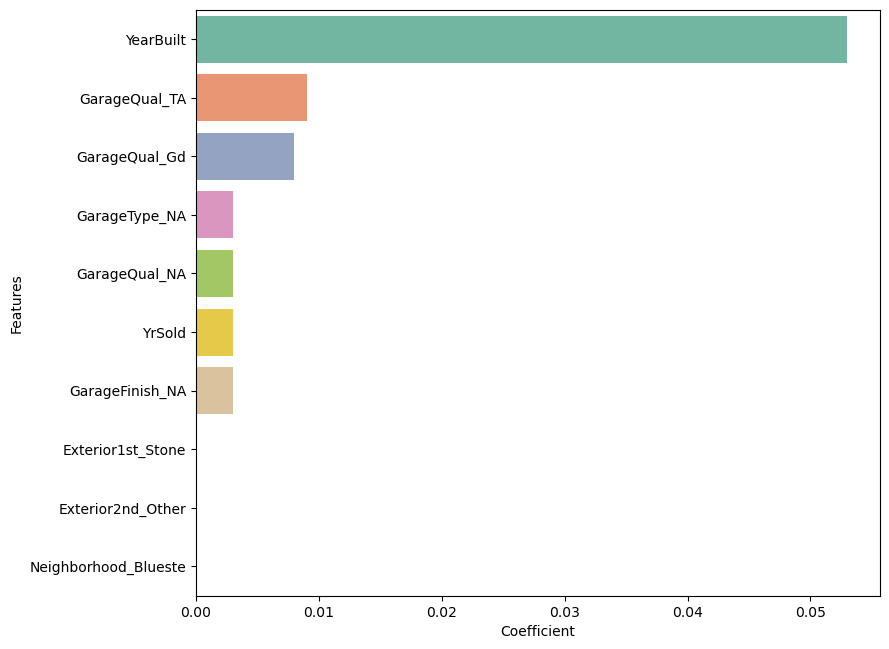

In [465]:
# Do an RFE to minimise the features to 20
X_train_ridge = X_train[house_ridge.Features]

lm = LinearRegression()
lm.fit(X_train_ridge, y_train)

# running RFE
rfe = RFE(lm, n_features_to_select = 20)            
rfe = rfe.fit(X_train_ridge, y_train)
# coefficient values

def find(x):
    return ridge_coeff_dict[x]

# Assign top 10 features to a temp dataframe for further display in the bar plot

temp1_df = pd.DataFrame(list(zip( X_train_ridge.columns, rfe.support_, rfe.ranking_)), columns=['Features', 'rfe_support', 'rfe_ranking'])
temp1_df = temp1_df.loc[temp1_df['rfe_support'] == True]
temp1_df.reset_index(drop=True, inplace=True)

temp1_df['Coefficient'] = temp1_df['Features'].apply(find)
temp1_df = temp1_df.sort_values(by=['Coefficient'], ascending=False)
temp1_df = temp1_df.head(10)
temp1_df

plt.figure(figsize=(30,35))
plt.subplot(4,3,1)
sns.barplot(y = 'Features', x='Coefficient', palette='Set2', data = temp1_df)
plt.show()

### Lasso Regularization

In [466]:
lasso = Lasso()

# Alpha to be considered
params = {'alpha': [0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.001, 0.002, 0.003, 0.004, 0.005, 0.01]}

# 5-fold cross validation
folds = 5
lasso_model_cv = GridSearchCV(estimator = lasso,                         
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

lasso_model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 11 candidates, totalling 55 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.0002, 0.0003, 0.0004, 0.0005,
                                   0.001, 0.002, 0.003, 0.004, 0.005, 0.01]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [467]:
# display the mean scores

lasso_cv_results = pd.DataFrame(lasso_model_cv.cv_results_)
lasso_cv_results[['param_alpha', 'mean_train_score', 'mean_test_score', 'rank_test_score']].sort_values(by = ['rank_test_score'])

,param_alpha,mean_train_score,mean_test_score,rank_test_score
0,0.0001,-0.027418,-0.032777,1
1,0.0002,-0.028501,-0.033036,2
2,0.0003,-0.029428,-0.033704,3
3,0.0004,-0.030224,-0.034322,4
4,0.0005,-0.031010,-0.034975,5
5,0.001,-0.034838,-0.038582,6
6,0.002,-0.040919,-0.043997,7
7,0.003,-0.045451,-0.047860,8
8,0.004,-0.049504,-0.051656,9
9,0.005,-0.053257,-0.055250,10


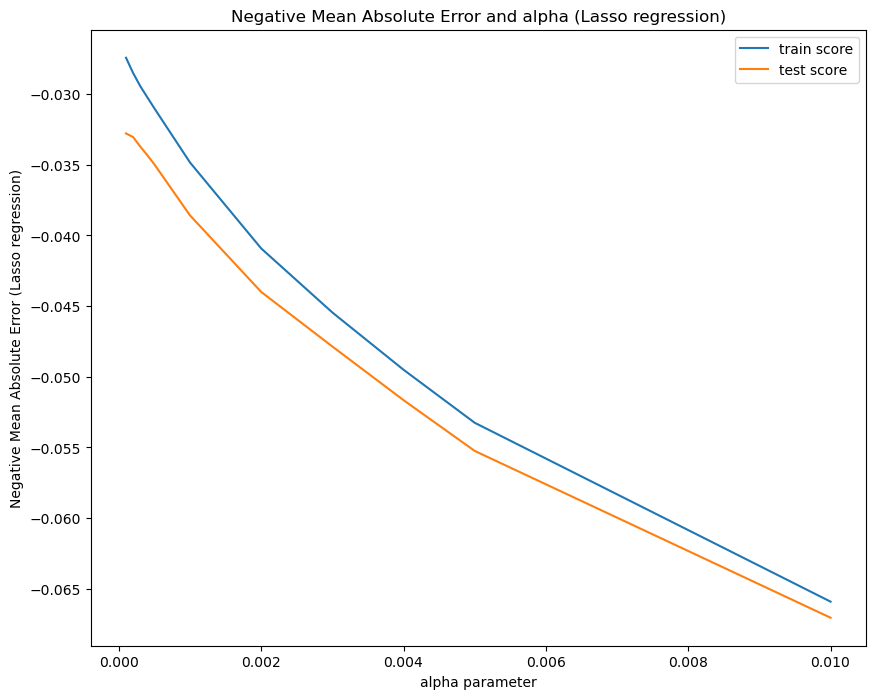

In [468]:
# plotting Negative Mean Absolute Error vs alpha for train and test

lasso_cv_results['param_alpha'] = lasso_cv_results['param_alpha'].astype('float64')

plt.figure(figsize=(10,8))
plt.plot(lasso_cv_results['param_alpha'], lasso_cv_results['mean_train_score'])
plt.plot(lasso_cv_results['param_alpha'], lasso_cv_results['mean_test_score'])
plt.xlabel('alpha parameter')
plt.ylabel('Negative Mean Absolute Error (Lasso regression)')

plt.title("Negative Mean Absolute Error and alpha (Lasso regression)")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [469]:
# lambda best estimator
lasso_model_cv.best_estimator_

Lasso(alpha=0.0001)

In [470]:
#using Best alpha
alpha = 0.0001

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 
lasso.coef_

array([-4.22122441e-02,  1.47321096e-03,  5.93284250e-02,  1.62377680e-01,
        9.36704898e-02,  1.38114551e-01,  7.40734794e-03,  0.00000000e+00,
        9.58973779e-02,  1.53088695e-01, -0.00000000e+00,  0.00000000e+00,
        2.44296264e-02,  4.07970113e-02,  1.01769707e-02, -0.00000000e+00,
        2.61257415e-04,  1.19295148e-01,  2.02677370e-02,  3.11340190e-02,
       -0.00000000e+00,  0.00000000e+00, -2.06555499e-02,  2.44313535e-02,
       -1.62439925e-03,  1.64419040e-02,  0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00,  2.21420626e-04,  1.36987475e-02, -1.07468557e-02,
       -0.00000000e+00,  1.15729151e-02, -1.28174050e-02, -0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  1.13706830e-02,
       -1.06473170e-02, -1.48556488e-02,  5.00582560e-02, -2.76658656e-02,
       -2.18218323e-02,  0.00000000e+00,  0.00000000e+00, -3.83048255e-02,
       -2.22689662e-02,  8.23429187e-03, -2.21507170e-02,  7.89066543e-03,
        4.26761878e-02, -

In [471]:
#Lets calculate the mean squared error value
mse = mean_squared_error(y_test, lasso.predict(X_test))
print("The mean squared error value is ",mse)

#predicting the R2 value on train data
y_train_pred = lasso.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
r2_train = metrics.r2_score(y_true=y_train, y_pred=y_train_pred)
print("The r2 value of train data is ",r2_train)


#predicting the R2 value on test data
y_test_pred = lasso.predict(X_test)
r2_test = metrics.r2_score(y_true=y_test, y_pred=y_test_pred)
print("The r2 value of test data is ",r2_test)

The mean squared error value is  0.0027754543844315978
0.9272590132444164
The r2 value of train data is  0.9272590132444164
The r2 value of test data is  0.903579097192392


In [472]:
#Features and coefficients

house_pricing_lasso = pd.DataFrame({'Features':X_train.columns, 'Coefficient':lasso.coef_.round(4)})
house_pricing_lasso = house_pricing_lasso[house_pricing_lasso['Coefficient'] != 0.00]
house_pricing_lasso.reset_index(drop=True, inplace=True)
house_pricing_lasso

,Features,Coefficient
0,MSSubClass,-0.0422
1,LotFrontage,0.0015
2,LotArea,0.0593
3,OverallQual,0.1624
4,OverallCond,0.0937
...,...,...
110,SaleType_WD,-0.0041
111,SaleCondition_AdjLand,0.0017
112,SaleCondition_Family,-0.0011
113,SaleCondition_Normal,0.0146


In [473]:
#Features and Coefficients

lasso_coeff_dict = dict(pd.Series(lasso.coef_, index = X_train.columns))
lasso_coeff_dict

{'MSSubClass': -0.042212244053515945,
 'LotFrontage': 0.0014732109558493645,
 'LotArea': 0.05932842503139313,
 'OverallQual': 0.1623776799961736,
 'OverallCond': 0.09367048978502658,
 'YearBuilt': 0.13811455078495338,
 'MasVnrArea': 0.007407347939797311,
 'BsmtUnfSF': 0.0,
 'TotalBsmtSF': 0.09589737788615678,
 'GrLivArea': 0.15308869509453532,
 'BedroomAbvGr': -0.0,
 'TotRmsAbvGrd': 0.0,
 'Fireplaces': 0.024429626440096795,
 'GarageCars': 0.04079701132181614,
 'GarageArea': 0.010176970684451251,
 'MoSold': -0.0,
 'YrSold': 0.00026125741465968396,
 'Total_sqr_footage': 0.11929514815164462,
 'Total_Bathrooms': 0.020267737033260323,
 'Total_porch_sf': 0.031134018977986136,
 'Total_Age': -0.0,
 'Garage_age': 0.0,
 'Remodel_age': -0.020655549860570815,
 'MSZoning_FV': 0.024431353493634872,
 'MSZoning_RH': -0.0016243992524493595,
 'MSZoning_RL': 0.016441904046457435,
 'MSZoning_RM': 0.0,
 'LotShape_IR2': -0.0,
 'LotShape_IR3': -0.0,
 'LotShape_Reg': 0.0002214206256146984,
 'LandContour_HLS':

In [474]:
#Minimising features to 20

X_train_lasso = X_train[house_pricing_lasso.Features]

lm = LinearRegression()
lm.fit(X_train_lasso, y_train)

#RFE
rfe = RFE(lm, n_features_to_select = 20)            
rfe = rfe.fit(X_train_lasso, y_train)
# coefficient values

def find(x):
    return lasso_coeff_dict[x]

# Top 10 features for plotting

temp2_df = pd.DataFrame(list(zip( X_train_lasso.columns, rfe.support_, rfe.ranking_)), columns=['Features', 'rfe_support', 'rfe_ranking'])
temp2_df = temp2_df.loc[temp2_df['rfe_support'] == True]
temp2_df.reset_index(drop=True, inplace=True)

temp2_df['Coefficient'] = temp2_df['Features'].apply(find)
temp2_df = temp2_df.sort_values(by=['Coefficient'], ascending=False)
temp2_df = temp2_df.head(10)
temp2_df

,Features,rfe_support,rfe_ranking,Coefficient
1,OverallQual,True,1,0.162378
5,GrLivArea,True,1,0.153089
3,YearBuilt,True,1,0.138115
7,Total_sqr_footage,True,1,0.119295
10,Neighborhood_StoneBr,True,1,0.096692
4,TotalBsmtSF,True,1,0.095897
2,OverallCond,True,1,0.093670
0,LotArea,True,1,0.059328
8,Neighborhood_Crawfor,True,1,0.050058
9,Neighborhood_NridgHt,True,1,0.042676


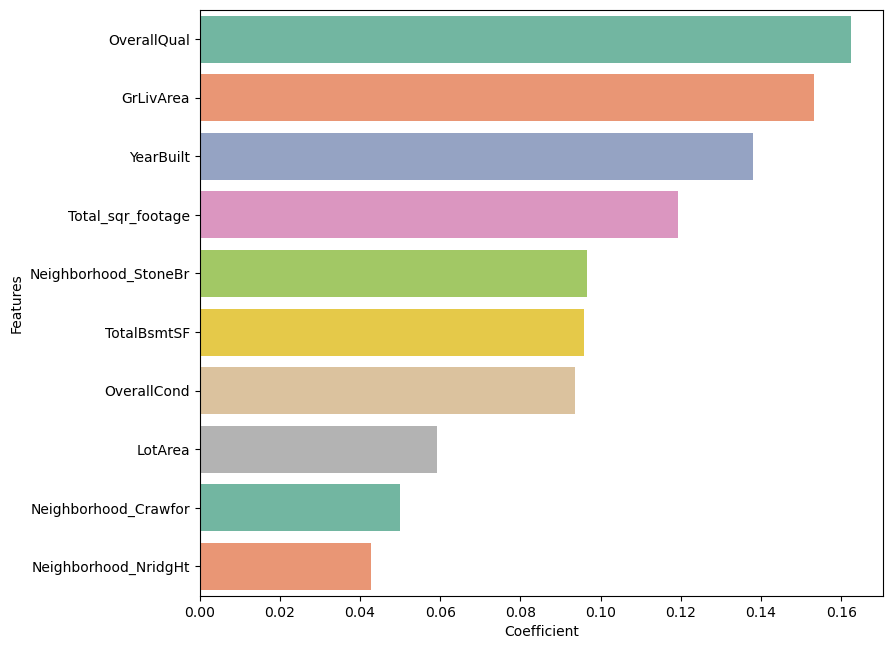

In [475]:
#  bar plot for predictor variables.

plt.figure(figsize=(30,35))
plt.subplot(4,3,1)
sns.barplot(y = 'Features', x='Coefficient', palette='Set2', data = temp2_df)
plt.show()

#### Conclusion :

##### Optimal alphas

   - Ridge - 2.0
   - Lasso - 0.0001

##### R2 values

 - Ridge 
     - Train = 93.05 , Test = 89.67
 - Lasso
     - Train = 92.72 , Test = 90.35
     
#####  Mean Squared error 

 - Ridge - 0.0029
 - Lasso - 0.0028

##### Numbers show Lasso has done a bit better compared to Ridge

##### TOP 5 Predicted variables are based on Lasso Regression:--

The house price increase with increase in
- OverallQual 
- GrLivArea 
- YearBuild 
- Total_sqr_footage 
- Neighborhood_StoneBr 

#### Assignment Part - II ( Subjective questions. Refer PDF for details)


##### Question 1 : What will be the changes in the model if you choose double the value of alpha for both ridge and lasso?

In [476]:
def ridge(alpha):
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train, y_train)
    ridge.coef_
    print(f"o/p alpha is {alpha}: ")
    mse = mean_squared_error(y_test, ridge.predict(X_test))
    print("The mean squared error value is ",mse)
    r2_train = metrics.r2_score(y_true=y_train, y_pred=y_train_pred)
    print("r2 of train data is ",r2_train)
    r2_test = metrics.r2_score(y_true=y_test, y_pred=y_test_pred)
    print("r2  of test data is ",r2_test)
    print()   
    
    ridge_coef = pd.DataFrame(ridge.coef_ , columns = ['Coefficient'], index =  X_train.columns)
    print(f"Top  features when alpha is {alpha} are :\n")
    print(ridge_coef.sort_values(by = 'Coefficient', ascending = False).head(10))

ridge(2)
ridge(4)

o/p alpha is 2: 
The mean squared error value is  0.0029710037334737646
r2 of train data is  0.9272590132444164
r2  of test data is  0.903579097192392

Top  features when alpha is 2 are :

                      Coefficient
Total_sqr_footage        0.129807
OverallQual              0.124509
GrLivArea                0.115330
Neighborhood_StoneBr     0.087322
OverallCond              0.081421
TotalBsmtSF              0.061141
LotArea                  0.058747
YearBuilt                0.057909
Neighborhood_Crawfor     0.048131
Condition1_PosN          0.040614
o/p alpha is 4: 
The mean squared error value is  0.0030261363951036555
r2 of train data is  0.9272590132444164
r2  of test data is  0.903579097192392

Top  features when alpha is 4 are :

                      Coefficient
Total_sqr_footage        0.120788
OverallQual              0.109450
GrLivArea                0.103179
Neighborhood_StoneBr     0.079223
OverallCond              0.070113
TotalBsmtSF              0.057610
LotArea   

In [477]:
def lasso(alpha):
   
    lasso = Lasso(alpha=alpha)      
    lasso.fit(X_train, y_train) 
    lasso.coef_
    print(f"o/p alpha is {alpha}: ")
    #mse
    mse = mean_squared_error(y_test, lasso.predict(X_test))
    print("The mean squared error value is ",mse)
    #R2 for Train
    y_train_pred = lasso.predict(X_train)
    r2_train = metrics.r2_score(y_true=y_train, y_pred=y_train_pred)
    print("r2 of train data is ",r2_train)
    #predicting the R2 value on test data
    y_test_pred = lasso.predict(X_test)
    r2_test = metrics.r2_score(y_true=y_test, y_pred=y_test_pred)
    print("r2 of tet data is ",r2_test)
    print()
    lasso_coef = pd.DataFrame(lasso.coef_ , columns = ['Coefficient'], index =  X_train.columns)
    print("Top features when alpha is {alpha} are:\n")
    print(lasso_coef.sort_values(by = 'Coefficient', ascending = False).head(10))
lasso(0.0001)
lasso(0.0002)

o/p alpha is 0.0001: 
The mean squared error value is  0.0027754543844315978
r2 of train data is  0.9272590132444164
r2 of tet data is  0.903579097192392

Top features when alpha is {alpha} are:

                      Coefficient
OverallQual              0.162378
GrLivArea                0.153089
YearBuilt                0.138115
Total_sqr_footage        0.119295
Neighborhood_StoneBr     0.096692
TotalBsmtSF              0.095897
OverallCond              0.093670
LotArea                  0.059328
Neighborhood_Crawfor     0.050058
Neighborhood_NridgHt     0.042676
o/p alpha is 0.0002: 
The mean squared error value is  0.003214151472641448
r2 of train data is  0.9226545291564521
r2 of tet data is  0.8883385046820145

Top features when alpha is {alpha} are:

                      Coefficient
Total_sqr_footage        0.178727
OverallQual              0.171195
YearBuilt                0.123135
GrLivArea                0.110261
Neighborhood_StoneBr     0.093491
OverallCond              0.088

##### Question 3 :After building the model, you realised that the five most important predictor variables in the lasso model are not available in the incoming data. You will now have to create another model excluding the five most important predictor variables. Which are the five most important predictor variables now?

In [478]:
top_5_pred = ['OverallQual','GrLivArea','YearBuilt','Total_sqr_footage','Neighborhood_StoneBr']
def lasso_after_drop_top_5_pred(top_5_pred, alpha):
    drop_cols = top_5_pred
    X_train.drop(labels = drop_cols, axis = 1, inplace=True)
    X_test.drop(labels = drop_cols, axis = 1, inplace=True)
    print(X_train.shape)
    print(X_test.shape)
    
    #### Lasso Model
    lasso = Lasso(alpha=alpha)
    lasso.fit(X_train,y_train)
    y_train_pred = lasso.predict(X_train)
    y_test_pred = lasso.predict(X_test)
    lasso_coef = pd.DataFrame(lasso.coef_ , columns = ['Coefficient'], index =  X_train.columns)
    print("Top 5  features when alpha is {alpha} are:\n")
    print(lasso_coef.sort_values(by = 'Coefficient', ascending = False).head(5))
    

lasso_after_drop_top_5_pred(top_5_pred, 0.0001)

(902, 187)
(388, 187)
Top 5  features when alpha is {alpha} are:

                 Coefficient
TotalBsmtSF         0.325291
TotRmsAbvGrd        0.122691
OverallCond         0.093921
Total_Bathrooms     0.085564
LotArea             0.068639
